In [169]:
#importing all the required module in the analysis of AUTOMOBILE DATASET

import pandas as pd #used to deal with dataset which is present in tabular format
import numpy as np #this library of python weused to perform mathematical and statistical operation in existing dataset
import seaborn as sb #this library or matplotlib library is used for data visualization
from matplotlib import pyplot as plt
import sklearn #this library is used to perform ML operation in existing dataset
import imblearn #this library we used to balance the quantity of binary class classifier output variable ka

# loading the dataset into df object

In [170]:
#now loading the tabular dataset which is present in format of CSV and converting into df object
path_dataset = 'cleaned_automobile.csv'
seprators = ','

#now loading the csv file by using pandas librray built in method read_csv() and converting dataset to df object
df = pd.read_csv(path_dataset,sep = seprators)
#to show top 5 records from df object
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,3.887730,dohc,130,111.0,21,27,13495
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,3.887730,dohc,130,111.0,21,27,16500
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,3.958907,ohcv,152,154.0,19,26,16500
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,3.994524,ohc,109,102.0,24,30,13950
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,3.994524,ohc,136,115.0,18,22,17450


In [171]:
#to check the shape of dataset achieve by using shape attribute of numpy library
df.shape

(191, 15)

# selecting input and output variable

In [172]:
#selecting input and output variable from dataset
x = df.drop('price',axis=1) #input variable must be in 2d array in nature
#where as output variable must be 1d in nature
y = df['price']
x.ndim,y.ndim

(2, 1)

# converting the object dtype column to numeric by using onehotencoder and doing scaling  to features of sklearn library

In [173]:
#before converting object column to numeric first we have to bifurgate the dataset according to dtypes of column
#to get list of columns according to dtypes
df_cat = x.select_dtypes(include = 'object').columns
df_num = x.select_dtypes(exclude = 'object').columns
print(f"categorical_features_columns: {df_cat}")
print()
print(f"numerical_features_columns: {df_num}")

categorical_features_columns: Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

numerical_features_columns: Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')


In [174]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

df_cat = x.select_dtypes(include = 'object').columns
df_num = x.select_dtypes(exclude = 'object').columns

numeric_transformer = StandardScaler()
obj_transformer = OneHotEncoder()

#will create pipeline first change object to numeric then change do scaling 
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", obj_transformer, df_cat),
         ("StandardScaler", numeric_transformer, df_num),        
    ]
)

x = preprocessor.fit_transform(x)
x.shape

(191, 47)

# #splitting dataset into 80:20 ratio

In [175]:
#so splitting the dataset into 80 :20 ratio pe
#80% of dataset we used for training purpose ke liye and reemaining 30% we used for testing purpose ke liye

from sklearn.model_selection import train_test_split

#creating an object of train test split class
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [176]:
#now checking the shape of training data and dimension
x_train.shape,y_train.shape,x_train.ndim,y_train.ndim

((152, 47), (152,), 2, 1)

In [177]:
#now checking the shape of testing data and dimension
x_test.shape,y_test.shape,x_test.ndim,y_test.ndim

((39, 47), (39,), 2, 1)

# Create an Evaluate Function to give all metrics after model Training

In [178]:
#now creating user defined function to train the model and evaluate the accuracy of model
def model_training(model):
    print(f"Name_of_model: {model}")
    #now 80% train data we r applying for training purpose
    model.fit(x_train,y_train) #it will check relation,plot scatterplot graph,and draw best fit line(predict by machine)on graph
    
    #now 20% of test data we have predicting the model
    y_pred = model.predict(x_test)
    
    #now evaluating the accuracy of model by finding out mse,rmse,r2(testing score of model)
    #so calling the metrics class of sklearn library
    from sklearn.metrics import mean_squared_error,r2_score
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print(f"mean_squared_error: {mse}")
    print(f"testing_score_model: {r2}")
    print('--------------------------------------------------------------------------------------------------')
    
    return model

# now feeding the dataset to the Regression Algorithm

In [179]:
#so calling the class of LR algo
from sklearn.linear_model import LinearRegression

#creating an object of LinearRegression class
lr = LinearRegression()

#now calling user defined function
lr = model_training(lr)

Name_of_model: LinearRegression()
mean_squared_error: 3888850.1945484458
testing_score_model: 0.8198106765252584
--------------------------------------------------------------------------------------------------


# now doing feature selection of model by applying Reqularisation to it finding out which feature is important to find output variable

#REGULARISATION OF MODEL

#lasso regularisation Theory

In [180]:
#in lasso regularisation----> at the time of training the model we add some external error in it bcoz of that best fit line get shifted
#and error @time of training minimum and also getting error @ time of testing also--->by default ACCURACY of Model increase!!!
#the external error we r adding in lasso --> rss+hyperparameter*(summartion(mod(slope of all the input variable)))
#in ML whaterver dataset we have the hyperparameter value lie btn 200-1000 set hyperparameter value according to u r dataset
#lasso make slope 0 of those input which is not impt to find output variable

In [181]:
#so calling the class of lasso Algorithm
from sklearn.linear_model import Lasso

In [182]:
#lasso model bhi first checking relationship btn input and output variable
#then those relation-ship visualizing on scatterplot graph then machine predict best fit which is close to all the datapoint
#and get error as minimum as possible from that we r getting Residual sum of squared error
# calculatiing slope of all the input variable
#rss+hyperparameter*(summartion(mod(slope of all the input variable))) applying this eqn to complete the training

In [183]:
# #now doing hit and trail method to identify hyperparameter for my dataset

# for i in range(200,1001,50):
#   #creating an object of lasso class
#   l1 = Lasso(i)
#   print(i)
#   #now training the model by adding external error in it
#   l1.fit(x_train,y_train)

#   #now checking the training score
#   train_score = l1.score(x_train,y_train)
#   print(f'training_score: {train_score}')

#   #now checking the testing score
#   test_score = l1.score(x_test,y_test)
#   print(f'test_score: {test_score}')
#   print()

# #hyperparameter value will be consider for this dataset is 950

In [184]:
#creating an object of lasso class
l1 = Lasso(950)
l1 = model_training(l1)

Name_of_model: Lasso(alpha=950)
mean_squared_error: 9426567.972498223
testing_score_model: 0.563221306895739
--------------------------------------------------------------------------------------------------


#Now Applying Ridge Regularisation to this dataset

In [185]:
#so calling the class
from sklearn.linear_model import Ridge

#ridge also at time training adding some external error in it!
#we add some external error in it bcoz of that best fit line get shifted
#and error @time of training minimum and also getting error @ time of testing also--->by default ACCURACY of Model increase!!!
#the external error we r adding in Ridge --> rss+hyperparameter*(summartion(slope of all the input variable)^2)
#in ML whaterver dataset we have the hyperparameter value lie btn 0-50 set hyperparameter value according to u r dataset
#Ridge make slope value Maximum of those input which is not impt to find output variable!!


In [186]:
# for i in range(0,51,3):
#   #creating an object of Ridge class
#   l2 = Ridge(i)
#   print(i)
#   #now training the model by adding external error in it
#   l2.fit(x_train,y_train)

#   #now checking the training score
#   train_score = l2.score(x_train,y_train)
#   print(f'training_score: {train_score}')

#   #now checking the testing score
#   test_score = l2.score(x_test,y_test)
#   print(f'test_score: {test_score}')
#   print()

#the hyperparameter value for ridge will taken into consideration is 27

In [187]:
#creating an object of Ridge class
l2 = Ridge(30)
l2 = model_training(l2)

Name_of_model: Ridge(alpha=30)
mean_squared_error: 5859022.073367501
testing_score_model: 0.7285230413082924
--------------------------------------------------------------------------------------------------


# From above 3 model we can conclude the LR model is suitable for our dataset.coming out high accuracy 81% compare to others model

In [188]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = model_training(lin_model)
lin_model

Name_of_model: LinearRegression()
mean_squared_error: 3888850.1945484458
testing_score_model: 0.8198106765252584
--------------------------------------------------------------------------------------------------


LinearRegression()

In [189]:
y_pred =  lin_model.predict(x_test)

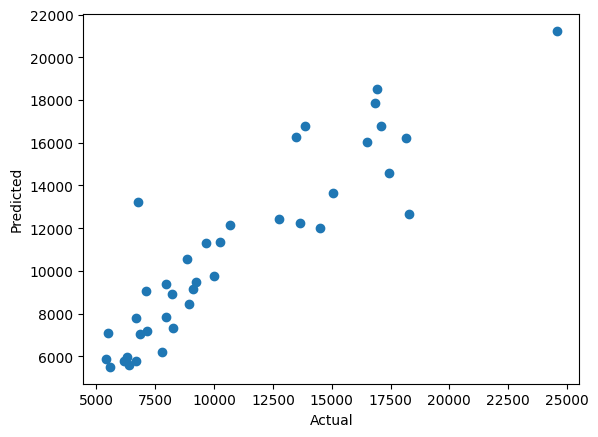

In [190]:
#between actual and predicted output what type of relationship we r getting
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

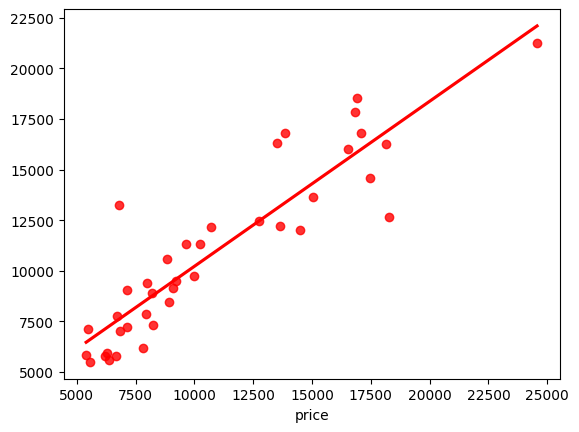

In [191]:
#now visualizing the machine what best line predict for this model
sb.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [192]:
#now represneting the data in a structure format according 
#to features what actual predicted and residual error we r getting

pred_df=pd.DataFrame({
                      'Actual_output':y_test,
                      'Predicted_output':y_pred,
                      'residual_error':y_test-y_pred})
pred_df

,Actual_output,Predicted_output,residual_error
31,7129,7202.645823,-73.645823
66,6189,5790.731916,398.268084
113,12764,12440.724114,323.275886
154,9639,11325.374714,-1686.374714
81,6849,7021.853944,-172.853944
122,18150,16243.649863,1906.350137
35,9095,9175.046214,-80.046214
103,17075,16794.205507,280.794493
183,16515,16017.645183,497.354817
99,13860,16794.205507,-2934.205507
